# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn import datasets

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
diabetes = datasets.load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [5]:
# 1. 10 numeric attribute (age, weight etc.)
# 2. data is the baseline and target is a quantitative measure of disease progression one year after baseline
# 3. 442

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [6]:
# yes, consistent as in data description

In [7]:
diabetes['data'].shape

(442, 10)

In [8]:
diabetes['target'].shape

(442,)

# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:


$y = \beta_0 + \beta_1·X_1 + \beta_2·X_2 + ... + \beta_n·X_n + \epsilon$


where:

- $X_1-X_n$: data 
- $\beta_0$: intercept 
- $\beta_1-\beta_n$: coefficients 
- $\epsilon$: error (cannot explained by model)
- $y$: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [9]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [10]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [11]:
diabetes_data_train = diabetes['data'][:421]
diabetes_data_test = diabetes['data'][422:]
diabetes_target_train = diabetes['target'][:421]
diabetes_target_test = diabetes['target'][422:]

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [12]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [13]:
print(diabetes_model.intercept_)

152.718929651221


In [14]:
print(diabetes_model.coef_)

[-1.81774793e-01 -2.38292415e+02  5.10802601e+02  3.27726454e+02
 -8.09873327e+02  4.89841345e+02  1.00217410e+02  1.81974785e+02
  7.41715416e+02  7.66594057e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [15]:
y_pred = diabetes_model.predict(diabetes_data_test)

In [16]:
print(y_pred)

[197.59839294 155.14324745 172.75435806 111.60251429 164.65611632
 131.10577235 259.0612676  100.4923271  116.98458327 124.2054576
 218.37929583  61.18798499 132.34126512 120.33334972  52.61053967
 193.95740798 102.50966048 123.53318546 210.98571577  52.52007012]


#### Print your `diabetes_target_test` and compare with the prediction. 

In [17]:
print(diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [18]:
# Its almost impossible to be the exact same as one is the prediction and one the baseline

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://online.stat.psu.edu/stat501/lesson/6/6.4) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    $H_0 : \beta_1 = \beta_2 = ... = \beta_{10} = 0$

    $H_a$ : At least one $\beta_j \ne 0$ (for j = 1, 2, ..., 10)
    
    
* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

<div style="text-align:center"><img src="../images/statsmodels.png" width=600/></div>

In [19]:
# your code here

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [20]:
# your answer here

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [21]:
auto = pd.read_csv('../data/auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [22]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [23]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [24]:
auto['model_year'].sort_values()

0      70
28     70
27     70
26     70
25     70
       ..
368    82
367    82
396    82
381    82
397    82
Name: model_year, Length: 398, dtype: int64

In [25]:
auto['model_year'].max() #oldest mdel

82

In [26]:
auto['model_year'].min() #newest model

70

Check the dataset for missing values and remove all rows containing at least one missing value.

In [27]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [28]:
auto = auto.dropna().reset_index(drop = True)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [29]:
auto['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [30]:
auto.drop(['car_name'], axis = 1, inplace = True)

In [31]:
auto.tail()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
387,27.0,4,140.0,86.0,2790,15.6,82
388,44.0,4,97.0,52.0,2130,24.6,82
389,32.0,4,135.0,84.0,2295,11.6,82
390,28.0,4,120.0,79.0,2625,18.6,82
391,31.0,4,119.0,82.0,2720,19.4,82


In [32]:
from sklearn.model_selection import train_test_split

y = auto['mpg']
X = auto.drop('mpg', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = 55)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [33]:
auto_model = LinearRegression() 

In [34]:
auto_model.fit(X_train, y_train)

LinearRegression()


# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://en.wikipedia.org/wiki/Coefficient_of_determination). Its formula is:

<div style="text-align:center"><img src="../images/r-squared.png" width=300/></div>

where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [35]:
y_pred = auto_model.predict(X_train) 

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score( y_pred, y_train) #r2 score based on SSE (error sum of squares) > value should be as small as possible
# r2 score should be as close to 1 as possible. the higher the better

0.7642440320149999

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [38]:
y_test_pred = auto_model.predict(X_test)

In [39]:
r2_score( y_test_pred, y_test) 

0.7432347770491917

#### Explaining the results

Please, compare the results for the training and test sets and comment. What can you say?

In [40]:
# The r2score of the training set is higher than the r2score of the test sets, which means its fine, but could be improved.
# overfitting: big difference between r2 train & test
# underfitting: bad scores on both sets

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [41]:
y = auto['mpg']
X = auto.drop('mpg', axis=1)

X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, random_state = 55, train_size= 0.9) 

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [42]:
auto_model09 = LinearRegression() 

In [43]:
auto_model09.fit(X_train09, y_train09)

LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [44]:
# train model
y_pred09 = auto_model09.predict(X_train09)

In [45]:
r2_score( y_pred09, y_train09)

0.7713047863048625

In [46]:
# test model
y_test_pred09 = auto_model09.predict(X_test09)

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [47]:
r2_score( y_test_pred09, y_test09) 

0.6257388409051768

In [48]:
# yes, but depends on each time, running the model.
# sklearn cross validation

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(auto_model, X, y, cv=10).mean()

0.6187419270694543

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE.

In [50]:
# Libraries
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`.

Fit the model and print the ranking.

In [51]:
# for X & y
selector = RFE(auto_model, n_features_to_select= 3, step = 1, verbose = 1) 
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)


Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Final selected features: 


,cylinders,acceleration,model_year
0,4.0,18.6,78.0
1,4.0,16.7,78.0
2,4.0,15.1,80.0
3,4.0,16.0,72.0
4,4.0,14.5,82.0
...,...,...,...
308,4.0,16.5,80.0
309,4.0,14.5,71.0
310,6.0,17.0,82.0
311,5.0,20.1,79.0


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `acceleration`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [52]:
selector.ranking_

array([1, 4, 2, 3, 1, 1])

In [53]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, train_size= 0.8)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [54]:
auto_model_reduced = LinearRegression() 

In [55]:
auto_model_reduced.fit(X_train_reduced, y_train_reduced)

LinearRegression()

In [56]:
# train model
y_pred_reduced = auto_model_reduced.predict(X_train_reduced)

In [57]:
r2_score( y_pred_reduced, y_train_reduced)

0.7338327064704717

In [58]:
# test model
y_test_pred_reduced = auto_model_reduced.predict(X_test_reduced)

In [59]:
r2_score( y_test_pred_reduced, y_test_reduced) 

0.8454189364005489

In [60]:
# while the r2 score of the train model went down a bit, the r2 score of the test model improved well

In [70]:
cross_val_score(auto_model_reduced, X, y, cv=10).mean() 

0.6187419270694543

#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.

# Decision Tree Model

In [62]:
from sklearn.tree import DecisionTreeRegressor # bec. linear regression
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
#mean_absolute_error, mean_squared_error should be closest to 0

In [63]:
dtr_model = DecisionTreeRegressor(max_depth=3) 

In [64]:
dtr_model.fit(X_train, y_train)

y_pred_train = dtr_model.predict(X_train)
y_pred_test  = dtr_model.predict(X_test)

In [65]:
#r2 score, absolte E and mean sq E to check/compare regression models

In [67]:
# train model
r2_score( y_pred_train, y_train)

0.7061290530668518

In [68]:
# test model
r2_score( y_pred_test, y_test) # bad score

0.4758292645007983

In [69]:
cross_val_score(dtr_model, X, y, cv=10).mean() #bad

0.5756660877301583

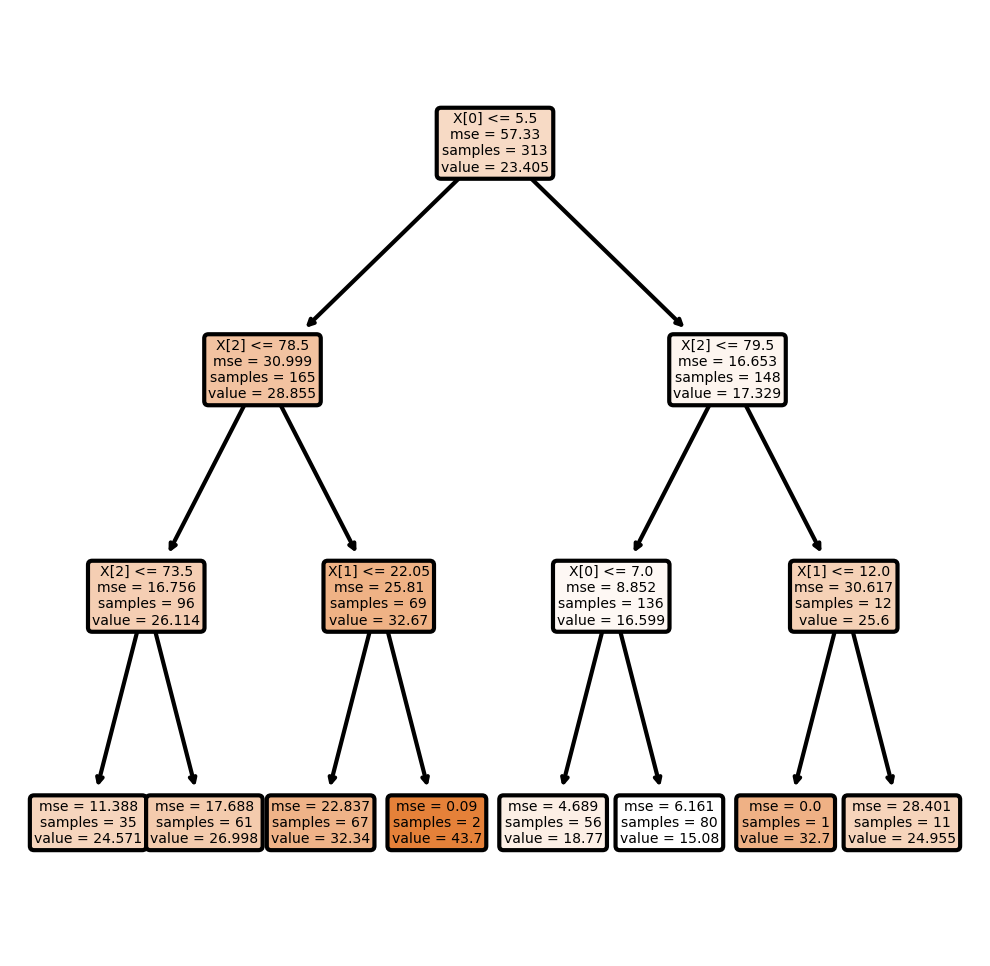

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dtr_model,filled = True, rounded=True)
plt.show()  